<a href="https://colab.research.google.com/github/Redwoods/Arduino/blob/master/ar-iot/py-pandas/iot_nano33_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas: access to the remote json from MongoDB
- The json file is generated on the fly from the express server of Node.js.
- The data stored in MongoDB are saved in the json file.
- The data are composed of three time series; temperature, humidity, and luminosity.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

## [데이터 로드 1.]
- loading real-time json file from MongoDB via web

- http://life21c.inje.ac.kr:3030/client_33.html

In [ ]:
# loading real-time json file from MongoDB via web (CORS, port=3030)
url="http://life21c.inje.ac.kr:3030/iot"
df=pd.read_json(url)
print('Large IoT data was retrieved successfully from MongoDB!')

Large IoT data was retrieved successfully from MongoDB!


## [데이터 로드 2.]
- Load the compressed data from github.com

In [ ]:
# # Load the compressed data from github.com
# # https://towardsdatascience.com/4-awesome-ways-of-loading-ml-data-in-google-colab-9a5264c61966
# # url_zip = 'https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/iot_data_201005_raw.zip'
# !wget https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/iot_data_201005_raw.zip
# !unzip iot_data_201005_raw.zip

In [ ]:
# df = pd.read_csv("iot_data_201005_raw.csv", index_col=False)
df.head()

,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
0,61974a4c39d363e662ef4461,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7,0
1,61974a5139d363e662ef4463,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
2,61974a5639d363e662ef4465,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
3,61974a5b39d363e662ef4467,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
4,61974a6039d363e662ef4469,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7,0


In [ ]:
df.head()

,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
0,61974a4c39d363e662ef4461,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7,0
1,61974a5139d363e662ef4463,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
2,61974a5639d363e662ef4465,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
3,61974a5b39d363e662ef4467,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
4,61974a6039d363e662ef4469,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7,0


In [ ]:
df.tail()

,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
67057,619c73cc3fdff90fdce8b139,2021-11-23 13:53:32.170,23.6,31.6,99,1008.9,32.9,32.9,34.2,0
67058,619c73d13fdff90fdce8b13b,2021-11-23 13:53:37.212,23.6,31.5,99,1008.9,32.5,33.7,33.7,0
67059,619c73d63fdff90fdce8b13d,2021-11-23 13:53:42.254,23.6,31.6,99,1008.9,32.5,33.7,33.7,0
67060,619c73db3fdff90fdce8b13f,2021-11-23 13:53:47.296,23.6,31.5,99,1008.9,32.9,32.9,34.1,0
67061,619c73e03fdff90fdce8b141,2021-11-23 13:53:52.338,23.7,31.6,100,1008.9,32.9,32.9,34.1,0


In [ ]:
df.shape, type(df)

((67062, 10), pandas.core.frame.DataFrame)

In [ ]:
df['date'][:1],df['date'][-1:]

(0   2021-11-19 15:55:08.449
 Name: date, dtype: datetime64[ns], 67061   2021-11-23 13:53:52.338
 Name: date, dtype: datetime64[ns])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67062 entries, 0 to 67061
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          67062 non-null  object        
 1   date         67062 non-null  datetime64[ns]
 2   temperature  67062 non-null  float64       
 3   humidity     67062 non-null  float64       
 4   luminosity   67062 non-null  int64         
 5   pressure     67062 non-null  float64       
 6   r_ratio      26528 non-null  float64       
 7   g_ratio      26528 non-null  float64       
 8   b_ratio      26528 non-null  float64       
 9   __v          67062 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 5.1+ MB


In [ ]:
df.describe()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
count,67062.000000,67062.000000,67062.000000,67062.000000,26528.000000,26528.000000,26528.000000,67062.0
mean,23.222032,39.798803,23.306030,1010.837258,33.398228,33.532999,33.019602,0.0
std,0.584208,4.450657,43.640483,3.442453,4.904612,3.756292,3.199714,0.0
min,21.000000,28.600000,0.000000,1002.800000,0.000000,25.000000,0.000000,0.0
25%,23.000000,34.600000,0.000000,1008.900000,33.300000,32.700000,32.700000,0.0
50%,23.300000,40.800000,0.000000,1011.400000,33.300000,33.300000,33.300000,0.0
75%,23.600000,43.500000,16.000000,1013.700000,34.600000,33.300000,34.100000,0.0
max,24.600000,45.700000,319.000000,1015.700000,50.000000,100.000000,50.000000,0.0


In [ ]:
# Save iot data in csv file.
# df.to_csv('iot_data_201005_raw.csv')

## Check data
- NaN
- missing value

In [ ]:
df.isnull().sum() #/df.shape[0]*100

_id                0
date               0
temperature        0
humidity           0
luminosity         0
pressure           0
r_ratio        40534
g_ratio        40534
b_ratio        40534
__v                0
dtype: int64

In [ ]:
df.isna().sum()

_id                0
date               0
temperature        0
humidity           0
luminosity         0
pressure           0
r_ratio        40534
g_ratio        40534
b_ratio        40534
__v                0
dtype: int64

## Replace NaN with mean: Imputation
- NaN ==>> 33.3 (100/3)

In [ ]:
df=df.fillna(33.3)
df.isna().sum()

_id            0
date           0
temperature    0
humidity       0
luminosity     0
pressure       0
r_ratio        0
g_ratio        0
b_ratio        0
__v            0
dtype: int64

In [ ]:
# for whole dataframe
# df = df.replace(np.nan, 33.3)
# df.isnull().sum()

## IoT data were cleaned!

In [ ]:
df.head()

,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
0,61974a4c39d363e662ef4461,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7,0
1,61974a5139d363e662ef4463,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
2,61974a5639d363e662ef4465,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
3,61974a5b39d363e662ef4467,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
4,61974a6039d363e662ef4469,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7,0


## New DataFrame : iot_data
### Dataframe with date and sensor values(temperature, humidity, luminosity, pressure, r, g, b)

In [ ]:
#  select columns
cols = ['date', 'temperature', 'humidity', 'luminosity', 'pressure', 'r_ratio', 'g_ratio', 'b_ratio']

In [ ]:
# Make iot data
iot_data = df[cols]

In [ ]:
iot_data.shape

(67062, 8)

In [ ]:
iot_data.head()  # date와 7 개의 신호를 확인.

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7
1,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7
2,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7
3,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7
4,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7


In [ ]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67062 entries, 0 to 67061
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         67062 non-null  datetime64[ns]
 1   temperature  67062 non-null  float64       
 2   humidity     67062 non-null  float64       
 3   luminosity   67062 non-null  int64         
 4   pressure     67062 non-null  float64       
 5   r_ratio      67062 non-null  float64       
 6   g_ratio      67062 non-null  float64       
 7   b_ratio      67062 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 4.1 MB


In [ ]:
iot_data.isna().sum()

date           0
temperature    0
humidity       0
luminosity     0
pressure       0
r_ratio        0
g_ratio        0
b_ratio        0
dtype: int64

In [ ]:
# Save iot data in csv file.
iot_data.to_csv('iot_nano33_211123_clean.csv')

## EDA

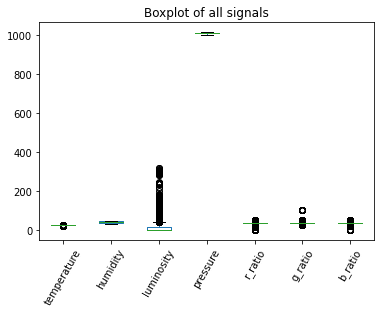

In [ ]:
# Plot boxplot
# iot_data[['temperature','humidity','luminosity']].plot.box(title='Boxplot of temperature, humidity, and luminosity')
# iot_data.loc[:,'temperature':'luminosity'].plot.box(title='Boxplot of temperature, humidity, and luminosity')
iot_data.iloc[:,1:].plot.box(title='Boxplot of all signals')
plt.xticks(rotation=60)
plt.show()

### Plot time series of sensor data

In [ ]:
iot_data.head()

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7
1,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7
2,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7
3,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7
4,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7


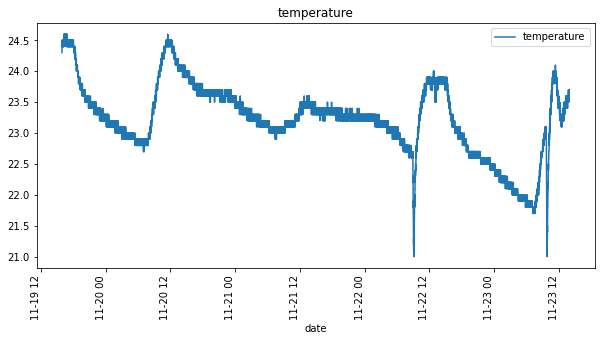

In [ ]:
iot_data.plot(x='date', y='temperature', figsize=(10,5), title='temperature')
plt.xticks(rotation=90)
plt.show()

### Set style of graph
- plt.style.use('fivethirtyeight')
- plt.style.use('ggplot')

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

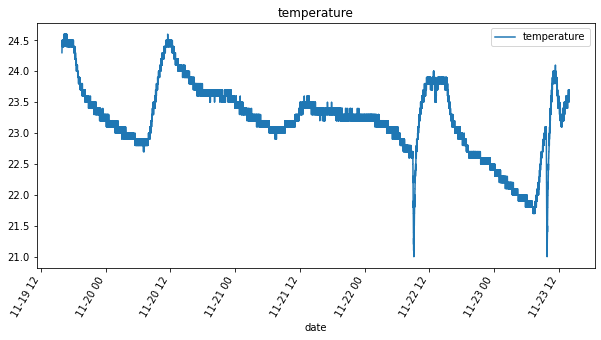

In [ ]:
iot_data.plot(x='date', y='temperature', figsize=(10,5), title='temperature')
plt.xticks(rotation=60)
plt.style.use('seaborn-pastel') # 'seaborn-pastel', 'fivethirtyeight'
plt.show()

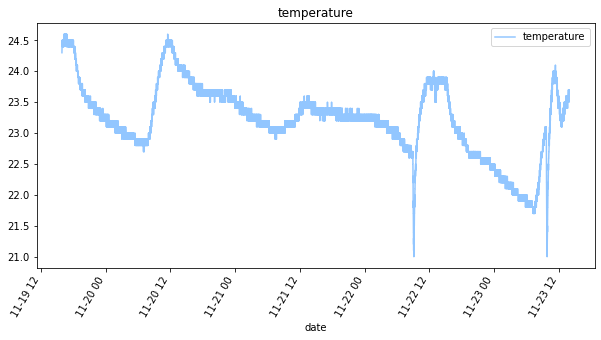

In [ ]:
iot_data.plot(x='date', y='temperature', figsize=(10,5), title='temperature')
plt.xticks(rotation=60)
plt.style.use('ggplot')
plt.show()

In [ ]:
# restore default style
plt.style.use('default')

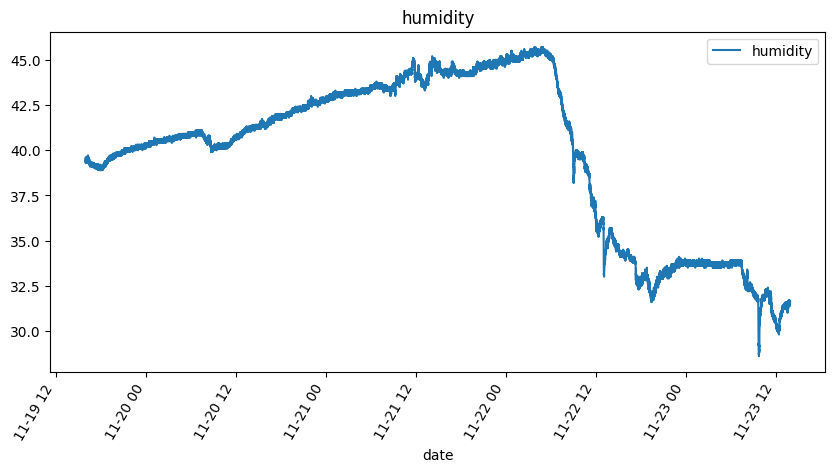

In [ ]:
iot_data.plot(x='date', y='humidity', figsize=(10,5), title='humidity')
plt.xticks(rotation=60)
plt.show()

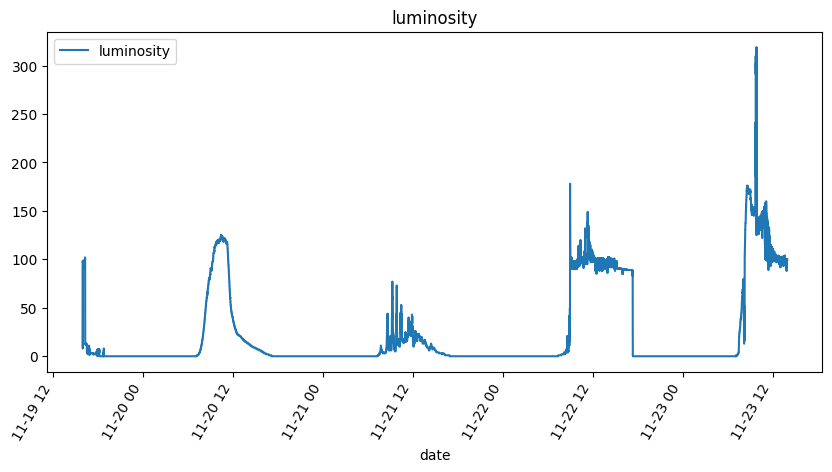

In [ ]:
iot_data.plot(x='date', y='luminosity', figsize=(10,5), title='luminosity')
plt.xticks(rotation=60)
plt.show()

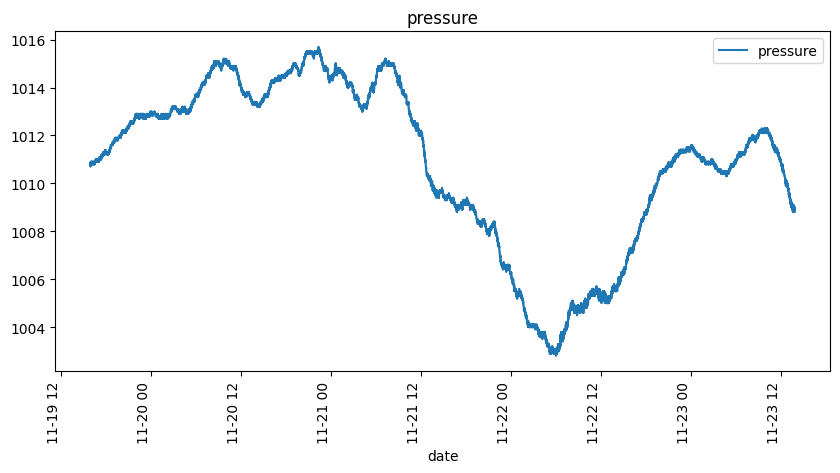

In [ ]:
iot_data.plot(x='date', y='pressure', figsize=(10,5), title='pressure')
plt.xticks(rotation=90)
plt.show()

#### 다중그래프 (multiple graphs)

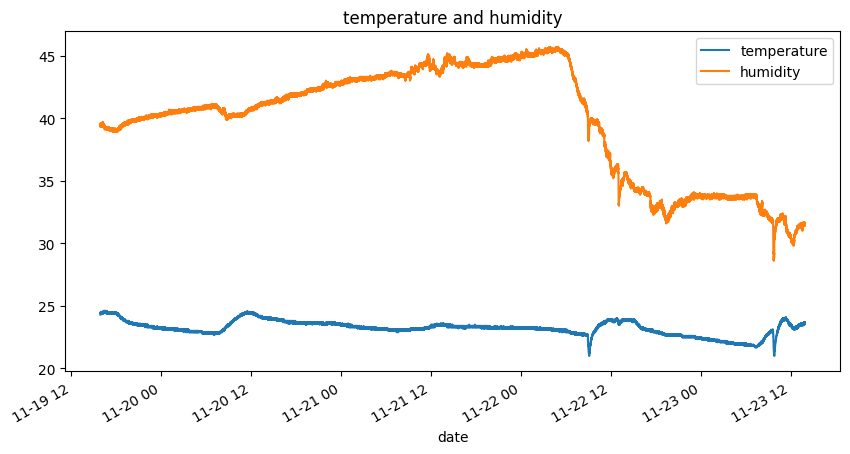

In [ ]:
# Plot of ['temperature','humidity']
iot_data.plot(x='date', y=['temperature','humidity'], figsize=(10,5), title='temperature and humidity')

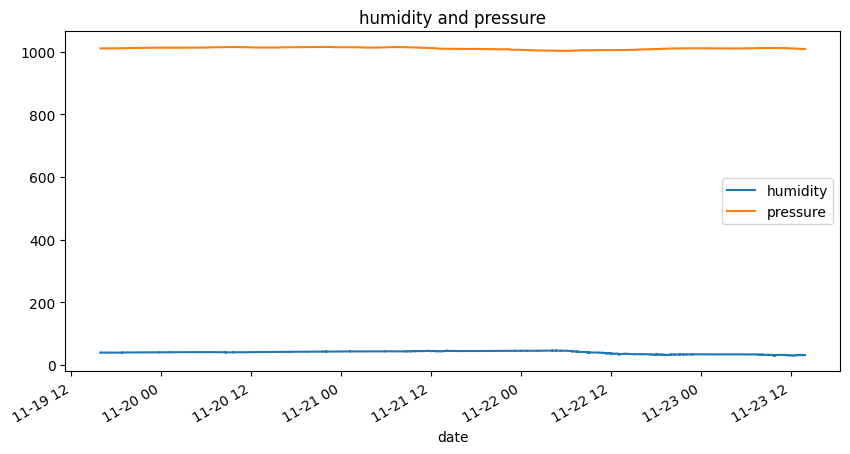

In [ ]:
# Plot of ['humidity', 'pressure']
iot_data.plot(x='date', y=['humidity','pressure'], figsize=(10,5), title='humidity and pressure')
# ax = iot_data.plot(x='date', y=['humidity'], figsize=(10,5), title='humidity and pressure')
# iot_data.plot(x='date', y=['pressure'], figsize=(10,5), secondary_y=True, ax=ax)


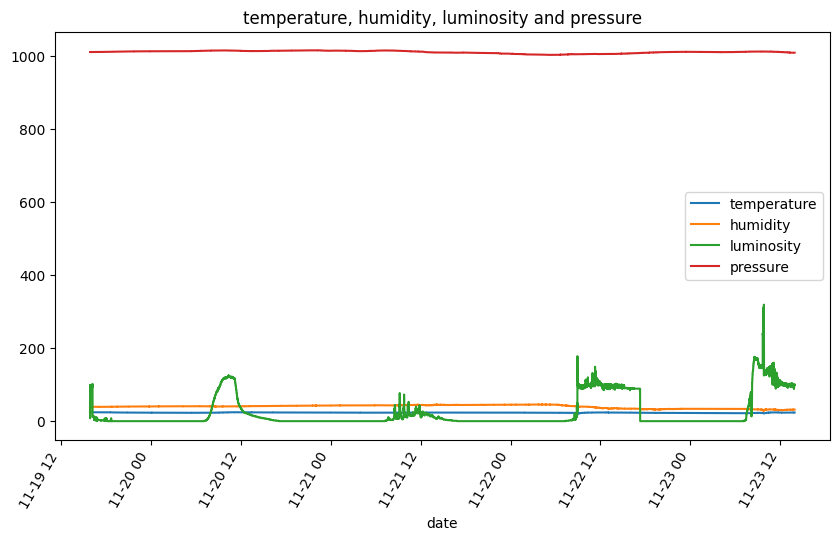

In [ ]:
# Plot of ['temperature','humidity','luminosity','pressure']
iot_data.plot(x='date', y=['temperature','humidity','luminosity','pressure'], figsize=(10,6), 
             title='temperature, humidity, luminosity and pressure')
plt.xticks(rotation=60)
plt.show()

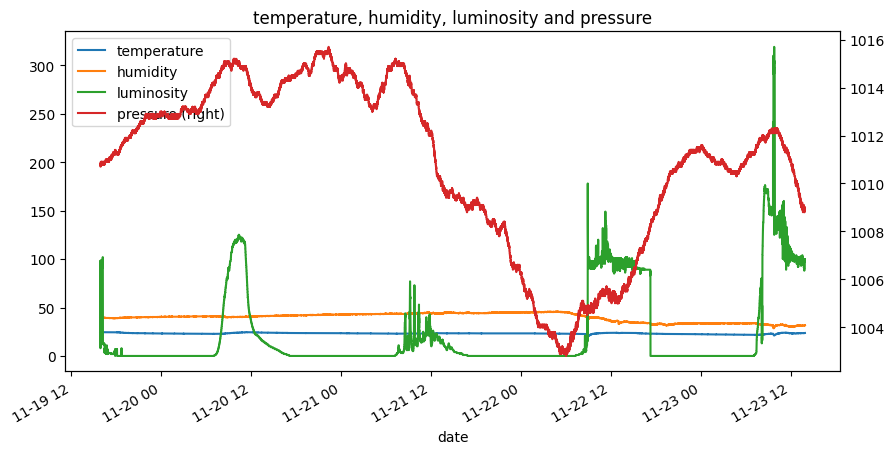

In [ ]:
# Plot of ['temperature','humidity','luminosity','pressure']
ax = iot_data.plot(x='date', y=['temperature','humidity','luminosity'], figsize=(10,6), 
             title='temperature, humidity, luminosity and pressure')
iot_data.plot(x='date', y=['pressure'], figsize=(10,5), secondary_y=True, ax=ax)
plt.xticks(rotation=60)
plt.show()

#### Plot the mean of sensor data

In [ ]:
iot_data[['temperature','humidity','luminosity']].mean()  

temperature    23.222032
humidity       39.798803
luminosity     23.306030
dtype: float64

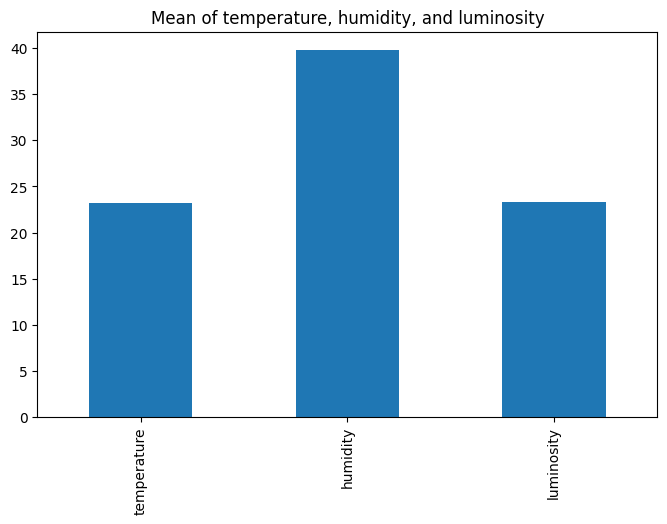

In [ ]:
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(8,5), 
                                                                  title="Mean of temperature, humidity, and luminosity")

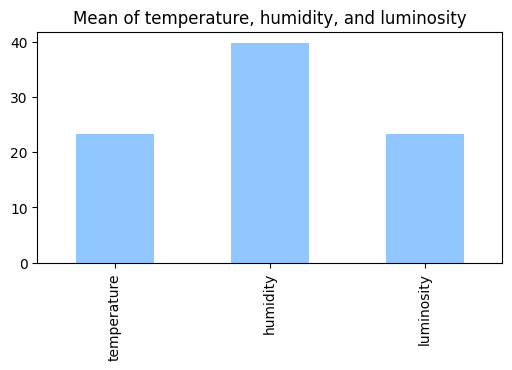

In [ ]:
plt.style.use('seaborn-pastel')   # fivethirtyeight, ggplot
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(6,3), 
                                                                  title="Mean of temperature, humidity, and luminosity")

# Advanced graphics using pandas

### Plot the change of sensor data over various time spans.

> time span: 60 sec, 1 hour, 1 day, 1 week

In [ ]:
iot_data.head()

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7
1,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7
2,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7
3,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7
4,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7


#### Set date as index of timestamp

In [ ]:
iot_data.head()

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7
1,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7
2,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7
3,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7
4,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7


In [ ]:
iot_data.set_index('date',inplace=True)

In [ ]:
iot_data.head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7


In [ ]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67062 entries, 2021-11-19 15:55:08.449000 to 2021-11-23 13:53:52.338000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  67062 non-null  float64
 1   humidity     67062 non-null  float64
 2   luminosity   67062 non-null  int64  
 3   pressure     67062 non-null  float64
 4   r_ratio      67062 non-null  float64
 5   g_ratio      67062 non-null  float64
 6   b_ratio      67062 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 4.1 MB


In [ ]:
# Convert date index to Datetime index, 중요!!!
iot_data.index = pd.to_datetime(iot_data.index)

In [ ]:
iot_data.info() # Range index -> timestamp(Datetime) index 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67062 entries, 2021-11-19 15:55:08.449000 to 2021-11-23 13:53:52.338000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  67062 non-null  float64
 1   humidity     67062 non-null  float64
 2   luminosity   67062 non-null  int64  
 3   pressure     67062 non-null  float64
 4   r_ratio      67062 non-null  float64
 5   g_ratio      67062 non-null  float64
 6   b_ratio      67062 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 4.1 MB


In [ ]:
iot_data.head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7


In [ ]:
# Estimate the mean of the iot data for every minute
iot_data.resample('60S').mean()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19 15:55:00,24.381818,39.327273,89.818182,1010.800000,33.654545,33.518182,32.745455
2021-11-19 15:56:00,24.408333,39.458333,97.750000,1010.791667,32.733333,33.033333,34.225000
2021-11-19 15:57:00,24.416667,39.416667,97.000000,1010.800000,32.366667,33.166667,34.466667
2021-11-19 15:58:00,24.400000,39.327273,97.636364,1010.818182,32.754545,32.972727,34.272727
2021-11-19 15:59:00,24.416667,39.358333,98.000000,1010.850000,32.900000,32.900000,34.200000
...,...,...,...,...,...,...,...
2021-11-23 13:49:00,23.590909,31.636364,91.727273,1008.972727,34.136364,31.609091,34.245455
2021-11-23 13:50:00,23.616667,31.525000,99.083333,1008.933333,32.666667,33.066667,34.225000
2021-11-23 13:51:00,23.625000,31.550000,98.666667,1008.966667,32.633333,33.133333,34.208333


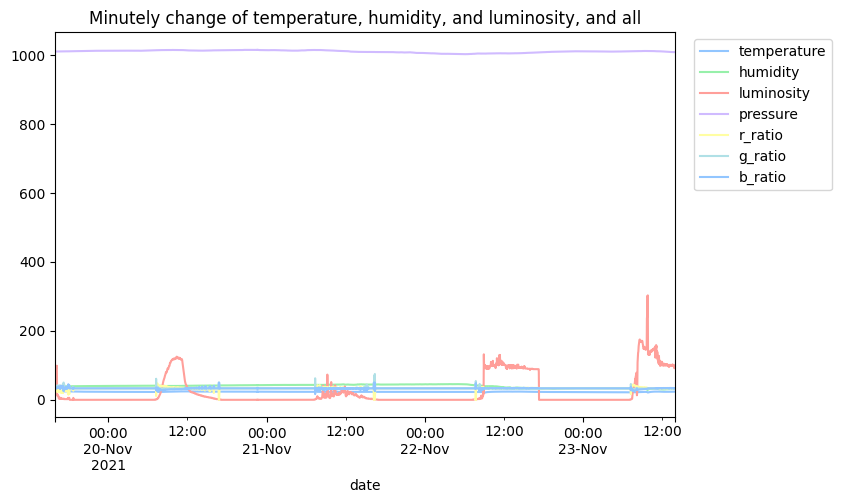

In [ ]:
#  Plot mean of the iot data per every minute
iot_data.resample('60S').mean().plot(figsize=(8,5), 
                                     title='Minutely change of temperature, humidity, and luminosity, and all')
plt.legend(bbox_to_anchor=(1.02, 1.0))

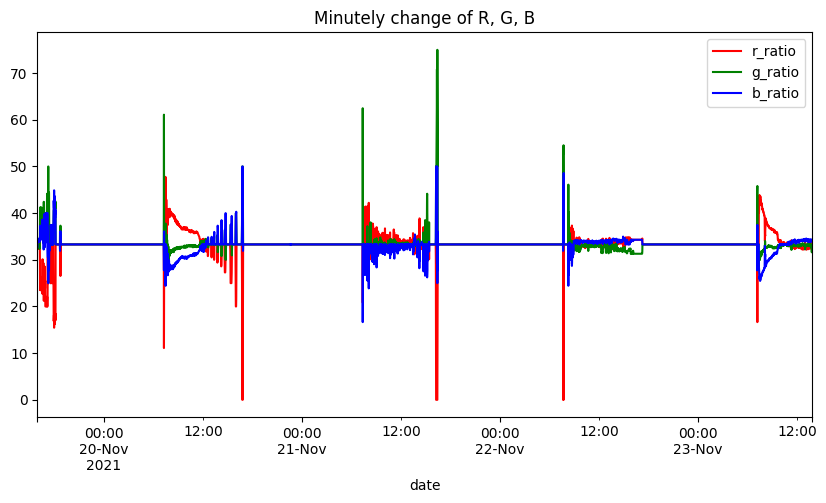

In [ ]:
#  Plot mean of the iot data per every minute
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('60S').mean().plot(figsize=(10,5), 
                                     title='Minutely change of R, G, B',
                                     color="rgb")

In [ ]:
3600/5

720.0

In [ ]:
# Estimate the mean of iot data for every hour
iot_data.resample('H').mean()  # mean per each hour

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19 15:00:00,24.405172,39.379310,96.120690,1010.812069,32.870690,33.113793,33.998276
2021-11-19 16:00:00,24.485154,39.319608,28.823529,1010.871008,26.413165,37.708683,35.866106
2021-11-19 17:00:00,24.419916,39.084853,2.712482,1011.141515,27.340813,37.701262,34.902104
2021-11-19 18:00:00,24.169468,39.218627,0.841737,1011.438936,31.048880,34.496359,34.373389
2021-11-19 19:00:00,23.744118,39.625070,0.000000,1011.871709,33.300000,33.300000,33.300000
...,...,...,...,...,...,...,...
2021-11-23 09:00:00,22.519608,31.285154,167.985994,1012.167507,35.444538,32.751401,31.827731
2021-11-23 10:00:00,23.346564,31.909257,143.330996,1012.002805,33.540393,33.121599,33.287237
2021-11-23 11:00:00,23.795798,31.226611,118.144258,1011.293838,33.135434,33.055042,33.760784


In [ ]:
iot_data.resample('H').mean().shape, iot_data.resample('H').mean().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2021-11-19 15:00:00 to 2021-11-23 13:00:00
Freq: H
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  95 non-null     float64
 1   humidity     95 non-null     float64
 2   luminosity   95 non-null     float64
 3   pressure     95 non-null     float64
 4   r_ratio      95 non-null     float64
 5   g_ratio      95 non-null     float64
 6   b_ratio      95 non-null     float64
dtypes: float64(7)
memory usage: 5.9 KB


((95, 7), None)

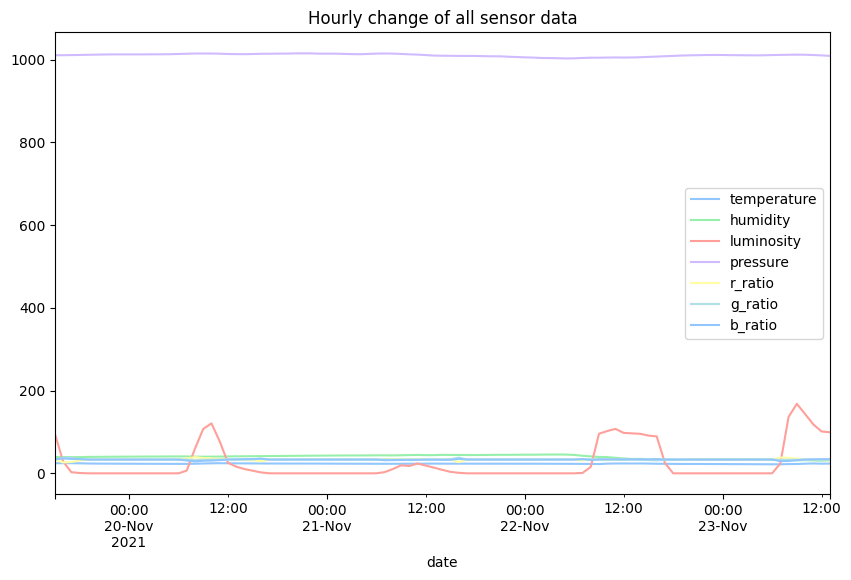

In [ ]:
#  Plot mean of the iot data per every hour 
iot_data.resample('H').mean().plot(figsize=(10,6), 
                                   title='Hourly change of all sensor data') #, 
                                #    ylim=[0,500])

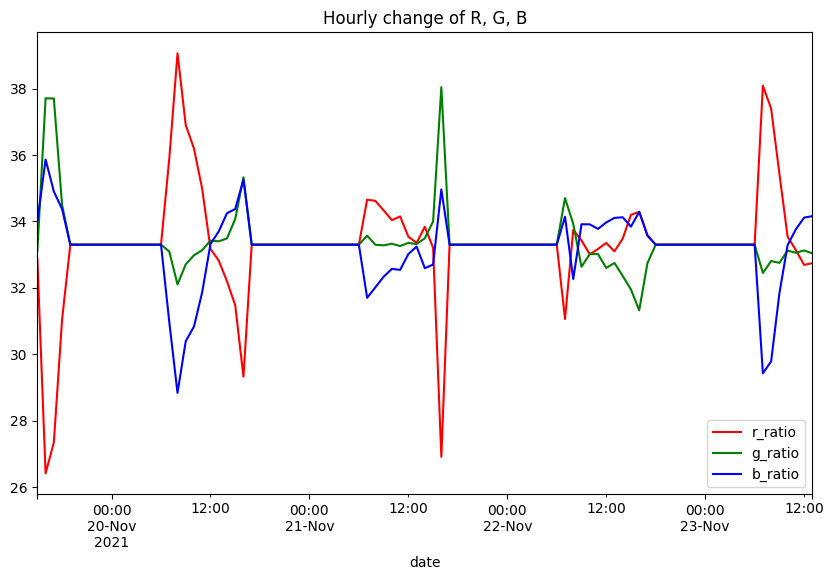

In [ ]:
#  Plot mean of the iot data per every minute
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('H').mean().plot(figsize=(10,6), 
                                    color = ['red', 'green', 'blue'],
                                    title='Hourly change of R, G, B')

## [도전하기]  하루 24 시간 동안의 R,G,B 변화 그래프를 그려보시오.

In [ ]:
# Estimate the mean of iot data for every day
iot_data.resample('D').mean()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19,23.813466,39.668128,4.972270,1011.953969,31.428544,34.535581,33.955355
2021-11-20,23.537238,41.197399,18.032679,1014.112089,33.675944,33.330855,32.916743
2021-11-21,23.265260,43.946768,4.969522,1011.407596,33.284773,33.547837,33.078455
2021-11-22,23.071767,38.387348,34.049020,1006.491206,33.305480,33.079727,33.533765
2021-11-23,22.519631,32.741872,56.153885,1011.063307,34.019551,33.103870,32.808697


In [ ]:
iot_data.resample('D').mean().shape, iot_data.resample('D').mean().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2021-11-19 to 2021-11-23
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  5 non-null      float64
 1   humidity     5 non-null      float64
 2   luminosity   5 non-null      float64
 3   pressure     5 non-null      float64
 4   r_ratio      5 non-null      float64
 5   g_ratio      5 non-null      float64
 6   b_ratio      5 non-null      float64
dtypes: float64(7)
memory usage: 320.0 bytes


((5, 7), None)

In [ ]:
iot_data.resample('D').mean().head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19,23.813466,39.668128,4.972270,1011.953969,31.428544,34.535581,33.955355
2021-11-20,23.537238,41.197399,18.032679,1014.112089,33.675944,33.330855,32.916743
2021-11-21,23.265260,43.946768,4.969522,1011.407596,33.284773,33.547837,33.078455
2021-11-22,23.071767,38.387348,34.049020,1006.491206,33.305480,33.079727,33.533765
2021-11-23,22.519631,32.741872,56.153885,1011.063307,34.019551,33.103870,32.808697


In [ ]:
iot_data_day=iot_data.resample('D').mean()
iot_data_day.head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19,23.813466,39.668128,4.972270,1011.953969,31.428544,34.535581,33.955355
2021-11-20,23.537238,41.197399,18.032679,1014.112089,33.675944,33.330855,32.916743
2021-11-21,23.265260,43.946768,4.969522,1011.407596,33.284773,33.547837,33.078455
2021-11-22,23.071767,38.387348,34.049020,1006.491206,33.305480,33.079727,33.533765
2021-11-23,22.519631,32.741872,56.153885,1011.063307,34.019551,33.103870,32.808697


In [ ]:
iot_data_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2021-11-19 to 2021-11-23
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  5 non-null      float64
 1   humidity     5 non-null      float64
 2   luminosity   5 non-null      float64
 3   pressure     5 non-null      float64
 4   r_ratio      5 non-null      float64
 5   g_ratio      5 non-null      float64
 6   b_ratio      5 non-null      float64
dtypes: float64(7)
memory usage: 320.0 bytes


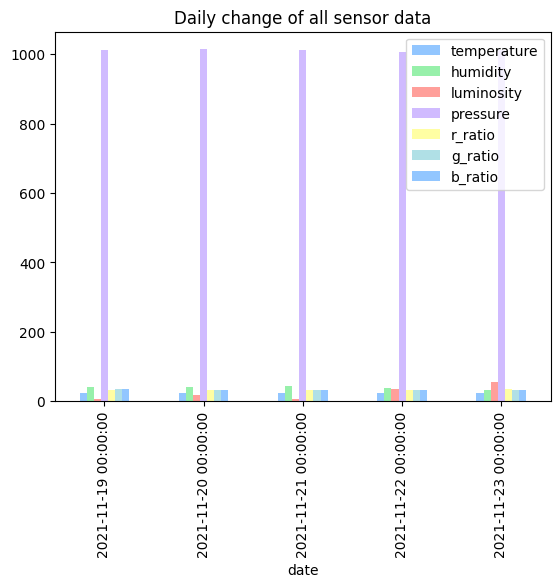

In [ ]:
#  Plot mean of the iot data per every day
iot_data.resample('D').mean().plot(kind='bar', #marker='o', ms=6, figsize=(12,6), 
                                   title='Daily change of all sensor data')

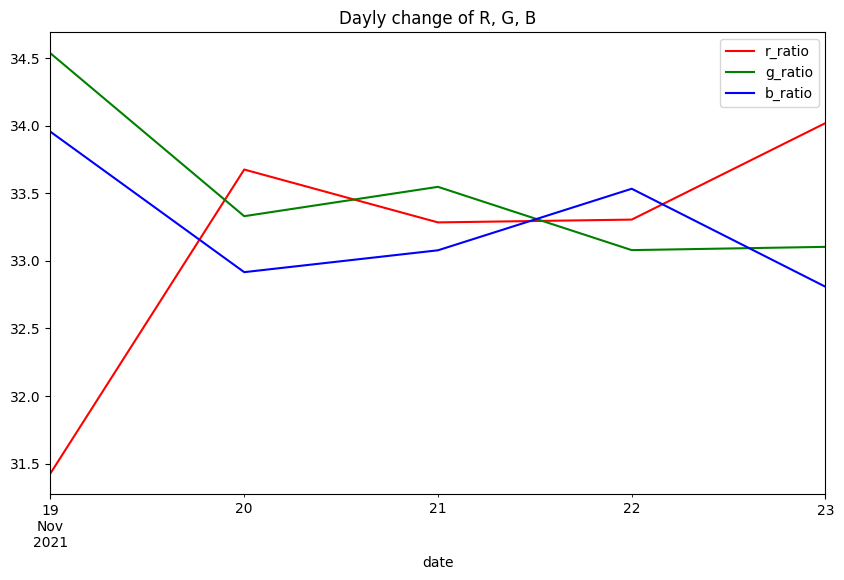

In [ ]:
#  Plot mean of the iot data per every day
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('D').mean().plot(figsize=(10,6), 
                                    color = ['r','g','b'], #marker='o', ms=6, 
                                    title='Dayly change of R, G, B')

## 위의 그래프를 파이 그래프로 그려보시오.

In [ ]:
#  Plot mean of the iot data per every day
# df.plot.pie(subplots=True, figsize=(6, 3))
iot_rgb = iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('D').mean()
iot_rgb.head()


,r_ratio,g_ratio,b_ratio
date,,,
2021-11-19,31.428544,34.535581,33.955355
2021-11-20,33.675944,33.330855,32.916743
2021-11-21,33.284773,33.547837,33.078455
2021-11-22,33.305480,33.079727,33.533765
2021-11-23,34.019551,33.103870,32.808697


In [ ]:
iot_rgb.iloc[0],iot_rgb.iloc[1]

(r_ratio    31.428544
 g_ratio    34.535581
 b_ratio    33.955355
 Name: 2021-11-19 00:00:00, dtype: float64, r_ratio    33.675944
 g_ratio    33.330855
 b_ratio    32.916743
 Name: 2021-11-20 00:00:00, dtype: float64)

In [ ]:
iot_rgb.index, len(iot_rgb.index)

(DatetimeIndex(['2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22',
                '2021-11-23'],
               dtype='datetime64[ns]', name='date', freq='D'), 5)

In [ ]:
# Convert timestamp to date string
iot_rgb.index[0].strftime('%Y-%m-%d')

'2021-11-19'

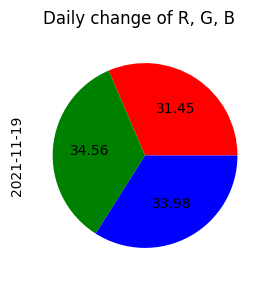

In [ ]:
iot_rgb.iloc[0].plot.pie(subplots=True, figsize=(5,3), 
                         colors = ['red', 'green', 'blue'], labeldistance=None, 
                         autopct='%.2f', 
                         title='Daily change of R, G, B')
plt.ylabel(iot_rgb.index[0].strftime('%Y-%m-%d'))
plt.show()

## Weekly graph

In [ ]:
# Estimate the mean of iot data for every week
iot_data.resample('W').mean()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-21,23.460635,42.153941,10.555958,1012.642894,33.184304,33.597523,33.135787
2021-11-28,22.869289,36.317055,42.155253,1008.167874,33.567342,33.088581,33.267870


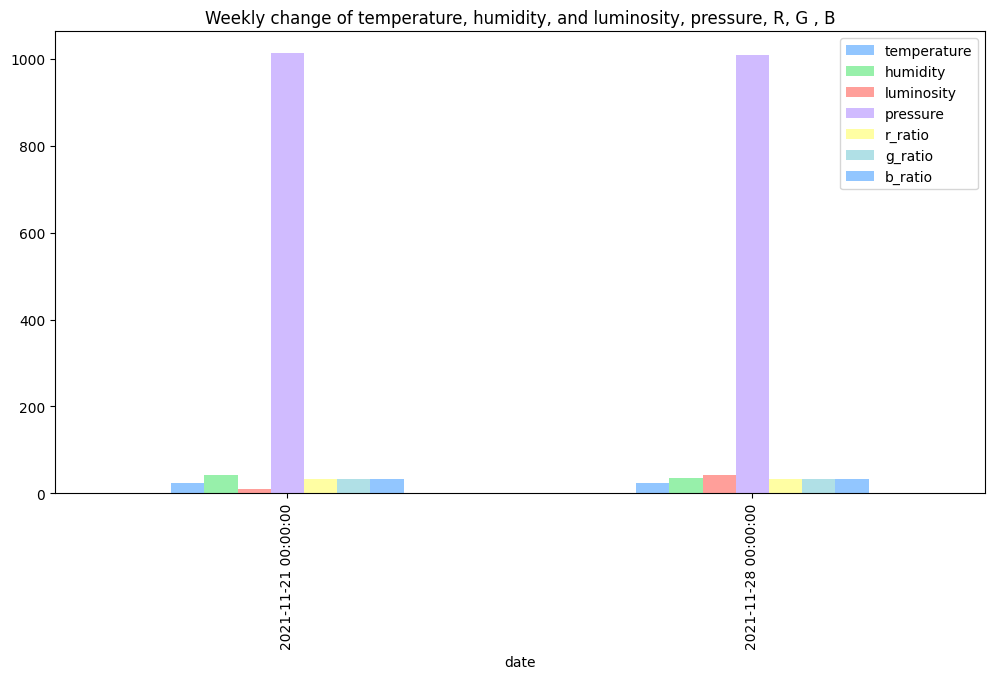

In [ ]:
#  Plot mean of the iot data per every week
iot_data.resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature, humidity, and luminosity, pressure, R, G , B')

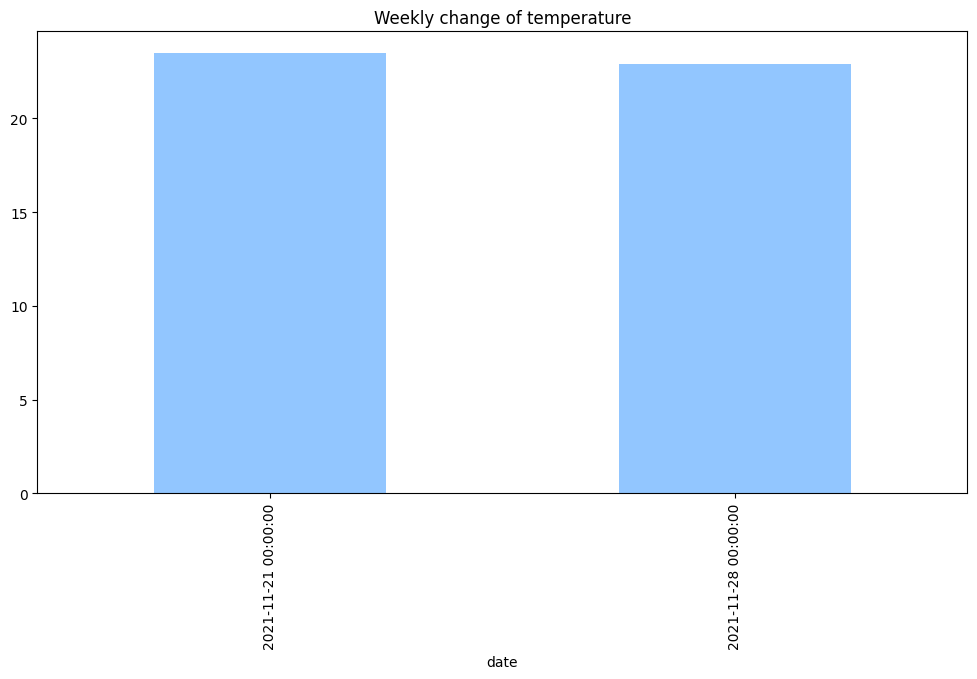

In [ ]:
#  Plot mean of the iot data per every week
iot_data['temperature'].resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature')

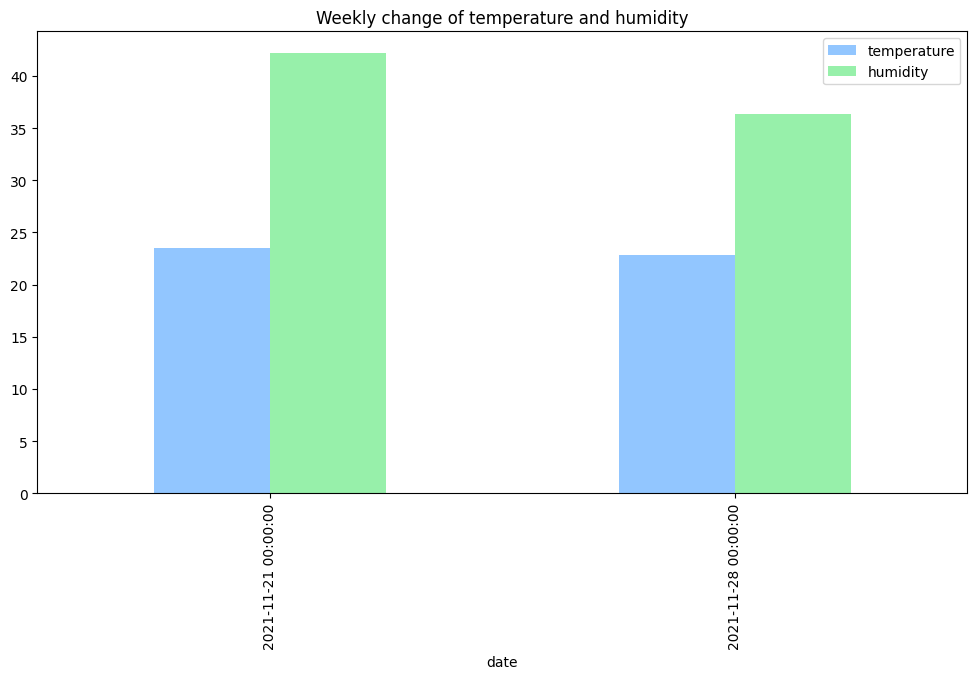

In [ ]:
#  Plot mean of the iot data per every week
iot_data[['temperature','humidity']].resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature and humidity')

# [도전] 다중 파이 그래프

### 다중 파이 그래프
- https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

In [ ]:
iot_rgb.shape,iot_rgb.index.size

((5, 3), 5)

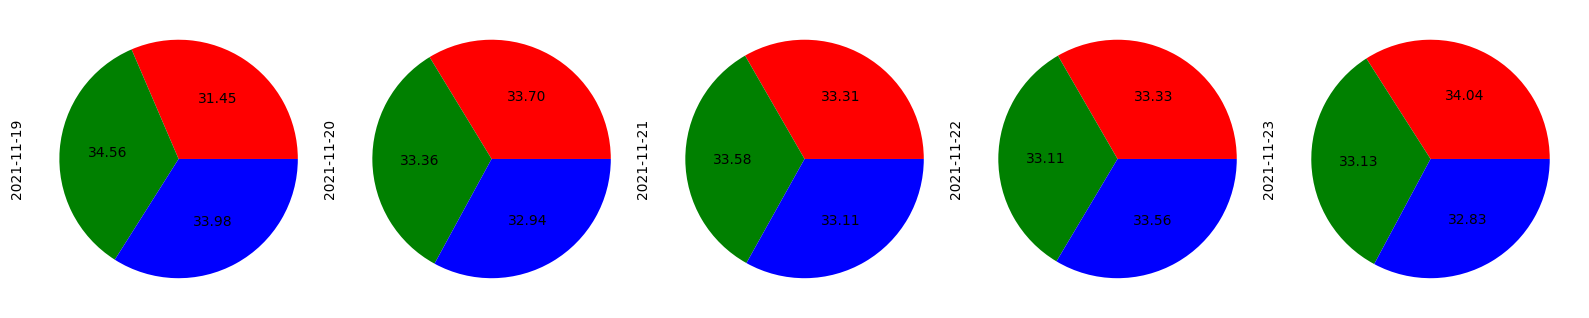

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=iot_rgb.index.size, figsize=(20,5))

fig.subplots_adjust(hspace=0.5, wspace=0.05)

for row in range(iot_rgb.index.size):
    fig.add_subplot(axs[row] )
    plt.pie(iot_rgb.iloc[row],
            colors = ['red', 'green', 'blue'], labeldistance=None, 
                         autopct='%.2f')  #, labels=df.columns)
    plt.ylabel(iot_rgb.index[row].strftime('%Y-%m-%d'))
    # plt.axis('off')

### axes array 코드 참조
```
for row in ax:
    for col in row:
        col.plot(x, y)
```

In [ ]:
iot_rgb.index.size

5

In [ ]:
# fig, axs = plt.subplots(nrows=(iot_rgb.index.size-1)//7+1, ncols=7, figsize=(16,16))
# # axs.set_axis_off()

# fig.subplots_adjust(hspace=0.5, wspace=0.05)
# idx=0
# for row in axs:
#     # fig.add_subplot(axs[row] )
#     # fig.add_subplot(5, 7, row+1)
#     # ax = axs[row]
#     for col in row:
#         col.pie(iot_rgb.iloc[idx],
#             colors = ['red', 'green', 'blue'], labeldistance=None, 
#                          autopct='%.2f')  #, labels=df.columns)
        
#         col.set_ylabel(iot_rgb.index[idx].strftime('%Y-%m-%d'),fontsize=12)
#         idx = idx + 1

#         if idx == iot_rgb.index.size:
#             idx = iot_rgb.index.size-1
        
#     # plt.axis('off')
#     # plt.axis('off')
#     # plt.grid(False)
# plt.show()

### animate pie chart
- https://towardsdatascience.com/learn-how-to-create-animated-graphs-in-python-fce780421afe
- https://pinkwink.kr/1090

In [ ]:
iot_rgb.columns,iot_rgb.shape

(Index(['r_ratio', 'g_ratio', 'b_ratio'], dtype='object'), (5, 3))

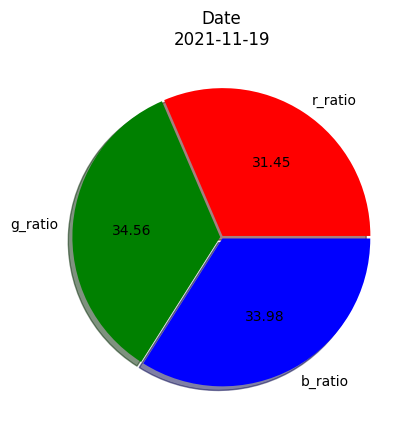

In [ ]:
fig,ax = plt.subplots()
explode=[0.01,0.01,0.01] #pop out each slice from the pie
def getmepie(i):
    iv = min(i, len(iot_rgb.index)-1)
    # def absolute_value(val): #turn % back to a number
    #     a  = np.round(val/100.*df1.head(i).max().sum(), 0)
    #     return int(a)
    ax.clear()
    plot = iot_rgb.iloc[iv].plot.pie(y=iot_rgb.columns, autopct='%.2f', label='',explode = explode, colors=['r','g','b'], shadow = True)
    plot.set_title('Date\n' + str(iot_rgb.index[iv].strftime('%Y-%m-%d')), fontsize=12)

# import matplotlib.animation as ani
animator = animation.FuncAnimation(fig, getmepie, interval = 200)
# plt.show()
rc('animation', html='html5')
animator

## 와, Great!